 # ASSIGNMENT
 
 ***CDF, PDF, PMF***

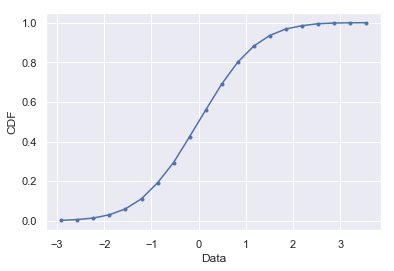

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

num_bins = 20

data = np.random.randn(10000)

counts, bin_edges = np.histogram (data, bins=num_bins, density=True)

cdf = np.cumsum (counts)

plt.plot (bin_edges[1:], cdf/cdf[-1], marker='.')

plt.xlabel('Data')
plt.ylabel('CDF')

plt.show()

## CDF using scipy

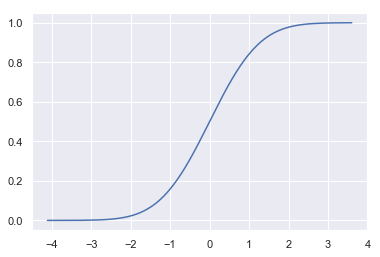

In [15]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt 
import seaborn as sns


x = np.random.randn(10000) # generate samples from normal distribution (discrete data)


norm_cdf = scipy.stats.norm.cdf(x) # calculate the cdf - also discrete
   
# plot the cdf
sns.lineplot(x=x, y=norm_cdf) 
plt.show()

# Comparing percentiles to CDF

To see how the percentiles relate to the CDF,  let's plot the data we calculated in the last exercise on the CDF.


The percentile variables from the previous exercise are available in the workspace as data_perc and percentiles.


To ensure the Y-axis of the CDF plot remains between 0 and 1, we need to rescale the percentiles array accordingly - in this case, dividing it by 100.

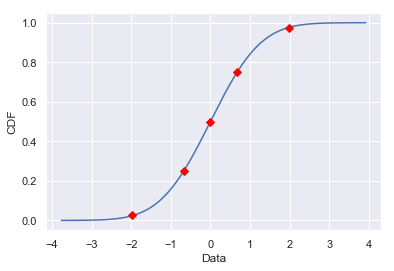

In [3]:
# Plot the CDF
sns.lineplot(x=x, y=norm_cdf)
# plt.plot(counts, bin_edges, '.')
plt.xlabel('Data')
plt.ylabel('CDF')

# Overlay percentiles as red diamonds.

percentiles = np.array([2.5, 25, 50, 75, 97.5])
data_perc = np.percentile(data, percentiles)


plt.plot(data_perc, percentiles/100, marker='D', color='red', linestyle='none')

# Show the plot
plt.show()

## PDF

How to Create a Probability Density Function Plot in Python with the Numpy, Scipy, and Matplotlib Modules


A probability density function (pdf) is a function that can predict or show the mathematical probability of a value occurring between a certain interval in the function.


So let's break down this code.

* We first import norm from scipy.stats. This allows us to create a normalized probability density function.

* We then import the numpy module as np. This means that we reference the numpy module with the keyword, np.

* We then import the matplotlib module plotting function because we are going to plot the data.

* So we use the numpy module to create the x-axis, we use sicpy to create a normalied probability density function, and then we use the matplotlib module to plot the data.

* We create a variable, x, and assign it to, np.arange(-4,4,0.001)

* What this line does is it creates an x-axis of values that range from -4 to 4 with an incremenet of 0.001.

* We then plot a normalized probability density function with the line, plt.plot(x, norm.pdf(x))

* We then show this graph plot with the line, plt.show()

After running this code, we get the following output shown below. 

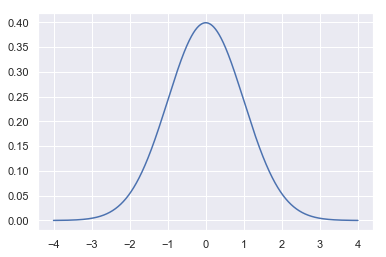

In [4]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


x= np.arange(-4,4,0.001)
plt.plot(x, norm.pdf(x))

plt.show()

##  A function that converts any list into a PMF


Plot the resulting PMF using Pandas inbuilt plot command with 'bar' parameter. Make sure that the Series passed is sorted by the index. Use a decorator

In [5]:
from collections import Counter
def sort(fn):
    def wrapper(*args,**kwargs):
        print("hello")
        return fn(sorted(*args),**kwargs)
    return wrapper
@sort
def pmf(series):
    n = len(series)
    d = {}
    counts = Counter(series)
    for _, key in enumerate(counts):
        d[key] = counts[key]/n
    return d

In [6]:
arr=[1,2,3,10,9,8,100,1000]

In [7]:
d=pmf(arr)
print(d)

hello
{1: 0.125, 2: 0.125, 3: 0.125, 8: 0.125, 9: 0.125, 10: 0.125, 100: 0.125, 1000: 0.125}


In [8]:
import pandas as pd

In [9]:
df=pd.DataFrame.from_dict(d,orient="index")

In [10]:
df.head()


,0
1,0.125
2,0.125
3,0.125
8,0.125
9,0.125


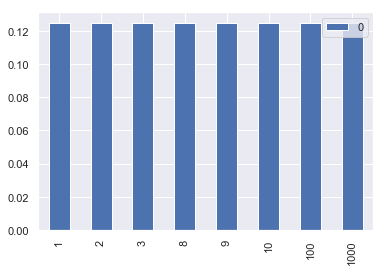

In [11]:

df.plot(kind="bar")



### [Functional Programming] 

CDF Using the lambda expression.

[0.70858265 0.62358335 0.74238175 ... 0.19104407 0.78142689 0.17457891]


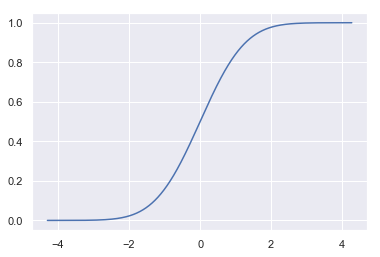

In [17]:
import matplotlib.pyplot as plt
import numpy as np # create some randomly ddistributed data:

x_1 = np.random.randn(10000) # generate samples from normal distribution (discrete data)
f = lambda x: scipy.stats.norm.cdf(x)
print(f(x_1))
sns.lineplot(x=x_1,y=f(x_1))

In [18]:
percentile(N,0.25,key=scipy.stats.norm.cdf)

NameError: name 'percentile' is not defined

## A partial function that always find the 25% of a given array.

In [19]:
import math
import functools

def percentile(N, percent, key=lambda x:x):
    if N is None:
        return None
    k = (len(N)-1) * percent
    f = math.floor(k)
    c = math.ceil(k)
    if f == c:
        return key(N[int(k)])
    d0 = key(N[int(f)]) * (c-k)
    d1 = key(N[int(c)]) * (k-f)
    return d0+d1
   
percentile1 = functools.partial(percentile, percent=0.25)


In [20]:
N=[1,2,3,4,5,6,7,8,9]
print(N)
print(percentile1(N))

[1, 2, 3, 4, 5, 6, 7, 8, 9]
3
